In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from wbfm.utils.projects.finished_project_data import ProjectData
import napari
import pandas as pd
import numpy as np
from wbfm.utils.feature_detection.class_frame_pair import FramePair
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors



Bad key "text.kerning_factor" on line 4 in
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-tracklet_wiggle/project_config.yaml"
fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17/project_config.yaml"

project_data = ProjectData.load_final_project_data_from_config(fname, to_load_tracklets=True, to_load_frames=True)

Output files: /scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/global2tracklet_manual.pickle, /scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/manually_split_tracklets.h5, /scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/split_names.pickle, /scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/split_times.pickle
Project data for directory:
/scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17 
Found the following raw data files:
red_data: True
green_data: True
============Segmentation===============
raw_segmentation: True
segmentation: True
============Tracklets==================
df_training_tracklets: True
reindexed_masks_training: True
============Traces=====================
red_traces: True
green_traces: True
final_tracks: True
behavior_annotations: True



In [3]:
all_frames = project_data.raw_frames

In [4]:
all_matches = project_data.raw_matches

# Starting from a single frame, match to others in the future that (we hope) are similar in posture and therefore (we hope) better matches

In [ ]:
f0 = all_frames[0]

frame_pair_options = all_matches[(0,1)].options

In [ ]:
frame_pair_options

In [ ]:
all_pairs = []
to_extend = False

In [21]:
window_size = 90

for i in range(len(all_pairs)+2, window_size):
    
    f1 = all_frames[i]
    
    frame_pair = FramePair(options=frame_pair_options, frame0=f0, frame1=f1)
    
    # Core matching algorithm
    frame_pair.match_using_feature_embedding()

    # Add additional candidates; the class checks if they are used
    frame_pair.match_using_local_affine()
    frame_pair.match_using_gp()
    frame_pair.match_using_fdnc()
    
    all_pairs.append(frame_pair)

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

In [22]:
num_matches = []

for p in all_pairs:
    p.calc_final_matches_using_bipartite_matching()
    num_matches.append(len(p.final_matches) / p.num_possible_matches)

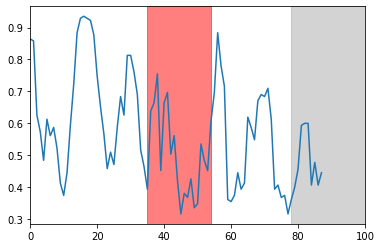

In [29]:
plt.plot(num_matches)
plt.xlim([0, 100])
project_data.shade_axis_using_behavior()

In [25]:
total_matches = [len(p.final_matches) / p.num_possible_matches for k, p in all_matches.items()]

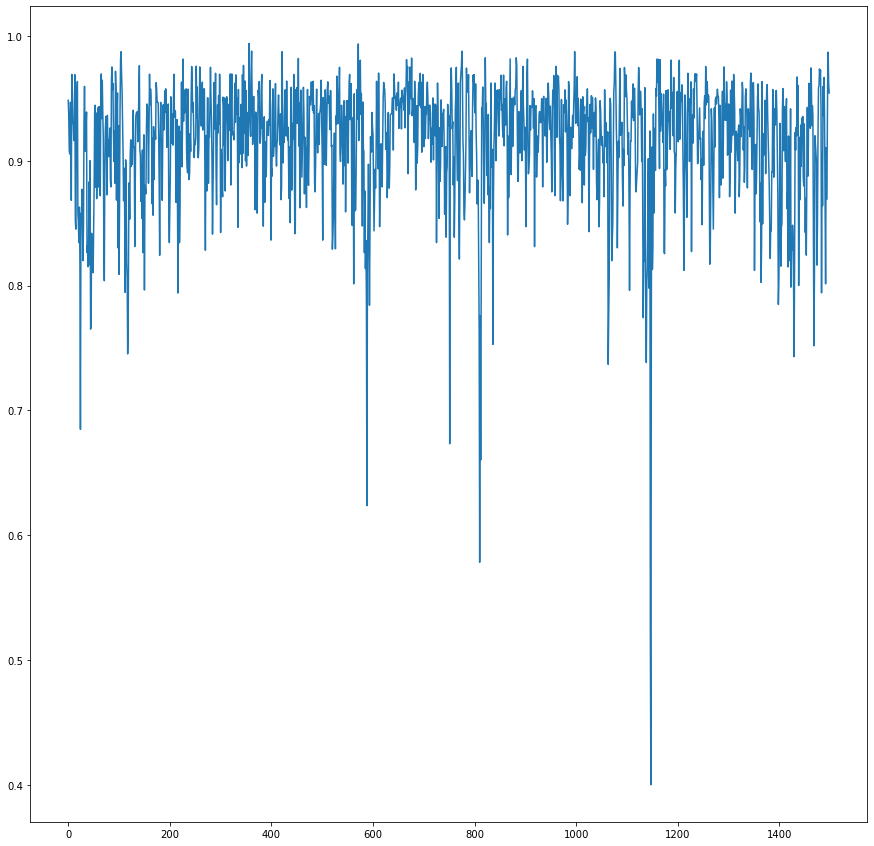

In [27]:
plt.figure(figsize=(15,15))
plt.plot(total_matches)

# Look at the posture using the centerlines

In [5]:

fname = "/project/neurobiology/zimmer/wbfm/centerline/wbfm_ulises_centerline_for_charlie/2021-03-04_16-17-30_worm3_ZIM2051-_spline_X_coords.csv"
centerlineX = pd.read_csv(fname)
fname = "/project/neurobiology/zimmer/wbfm/centerline/wbfm_ulises_centerline_for_charlie/2021-03-04_16-17-30_worm3_ZIM2051-_spline_Y_coords.csv"
centerlineY = pd.read_csv(fname)

In [6]:
fname = "/project/neurobiology/zimmer/wbfm/centerline/wbfm_ulises_centerline_for_charlie/2021-03-04_16-17-30_worm3_ZIM2051-_spline_K.csv"
centerlineK = pd.read_csv(fname)

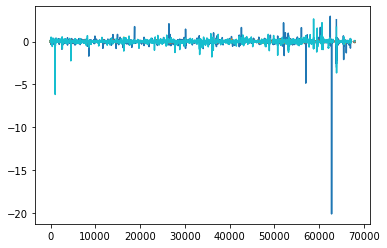

In [36]:
plt.plot(centerlineK);

In [7]:
pca = PCA(n_components=10, whiten=True)
centerlineK_nonan = centerlineK.replace(np.nan, 0.0)


In [8]:
PCA

sklearn.decomposition._pca.PCA

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


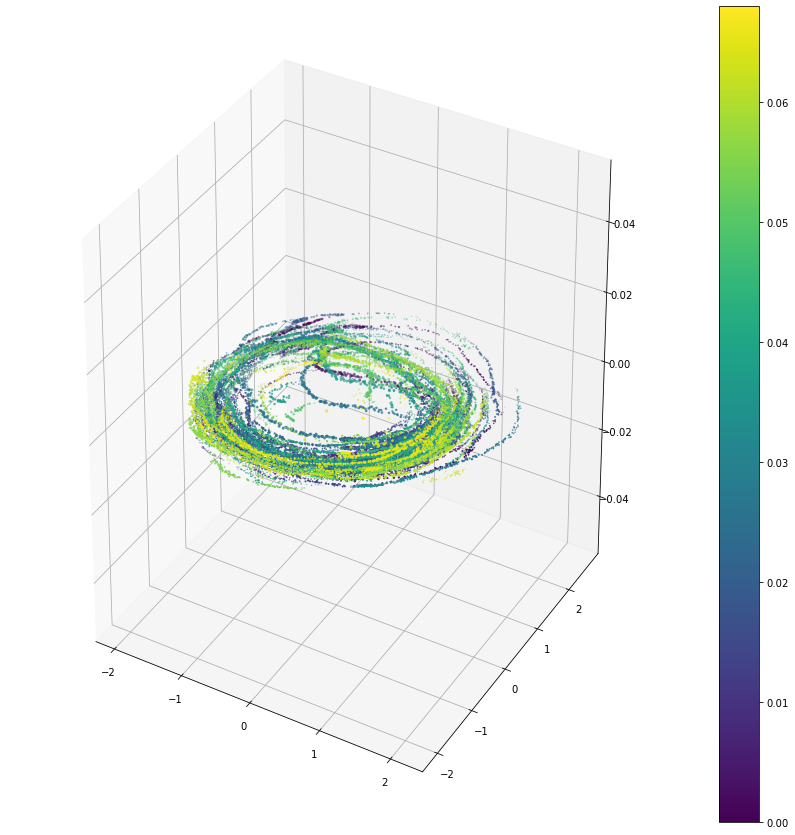

In [9]:
i_start = 5
i_end = 50
tspan = centerlineK.shape[0]
pca_proj = pca.fit_transform(centerlineK_nonan.iloc[:,i_start:i_end])
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(pca_proj[:, 0], pca_proj[:, 1], pca_proj[:, 2], c=np.arange(tspan)/1e6)
plt.colorbar()

# Get nearest neighbors from a reference point

In [12]:
neigh = NearestNeighbors(n_neighbors=3)
neigh.fit(pca_proj[:, :3])

NearestNeighbors(n_neighbors=3)

array([0.        , 0.05088087, 0.11363987, 0.06089648, 0.06903933])

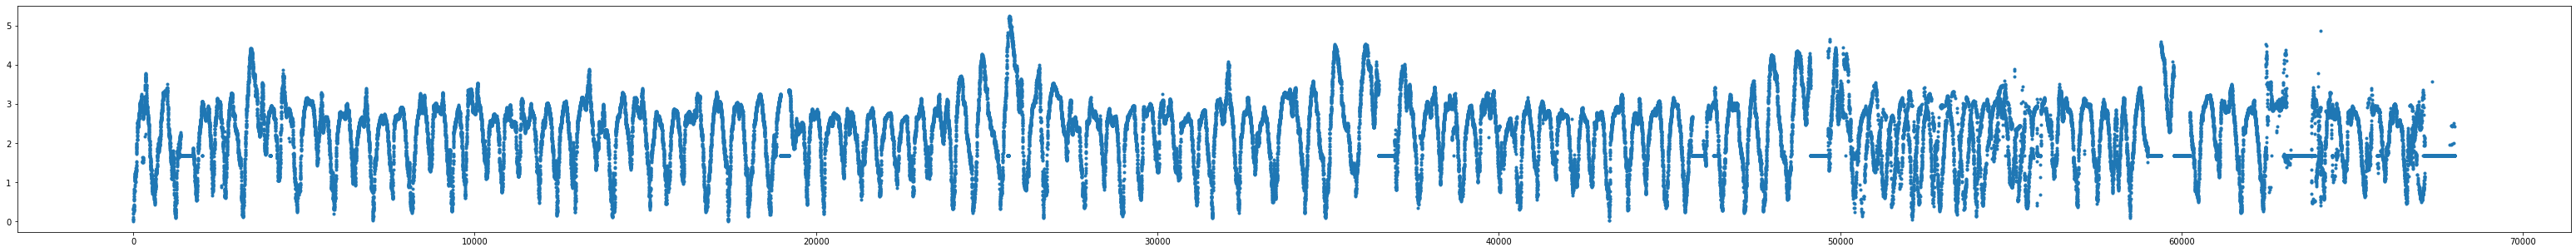

In [34]:
reference_pose = pca_proj[[0], :3]

all_dist = np.linalg.norm(pca_proj[:, :3] - reference_pose, axis=1)
plt.figure(figsize=(55,5))
plt.plot(all_dist, '.', lw=0.1)
all_dist[:5]

In [14]:
radius = 0.7

pts, neighboring_ind = neigh.radius_neighbors(reference_pose, radius=radius)
neighboring_ind = neighboring_ind[0]

In [15]:
# Convert to closest volume, round, and remove repeats
frames_per_volume = 32
neighboring_ind = np.round(neighboring_ind / frames_per_volume).astype(int)
neighboring_ind = list(set(neighboring_ind))
neighboring_ind.sort()
# neighboring_ind

(0, 20000)

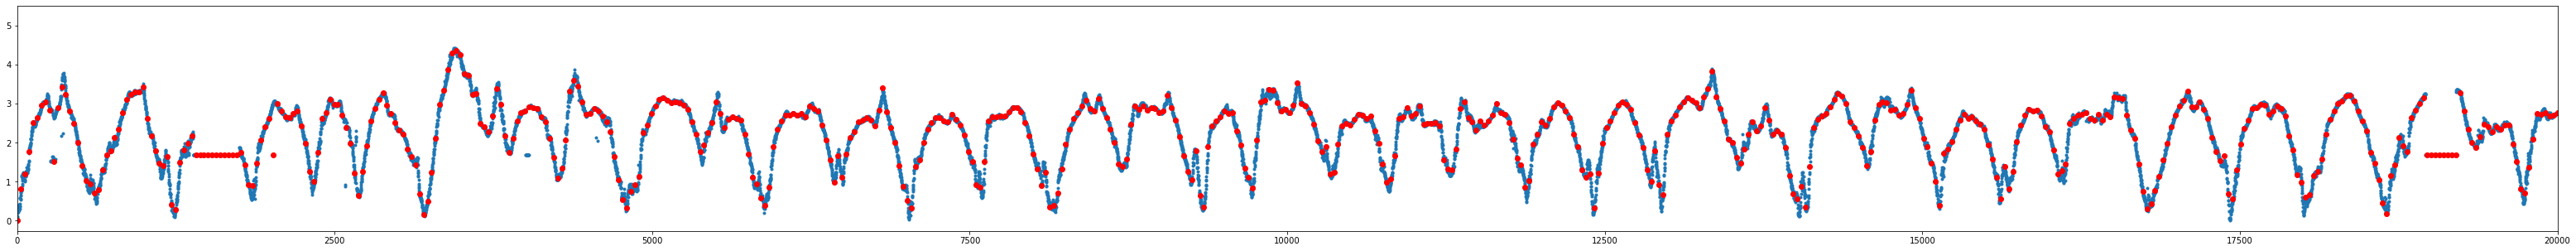

In [37]:
reference_pose = pca_proj[[0], :3]

all_dist = np.linalg.norm(pca_proj[:, :3] - reference_pose, axis=1)
plt.figure(figsize=(55,5))
plt.plot(all_dist, '.', lw=0.1)

x, y = [], []
for i in range(1500):
    x.append(32*i)
    y.append(all_dist[32*i])
plt.plot(x, y, 'ro')
all_dist[:5]
plt.xlim([0, 20000])

# Look at max intensity of the similar ones

In [17]:
# neighboring_ind

Text(0.5, 1.0, 'Frame 1')

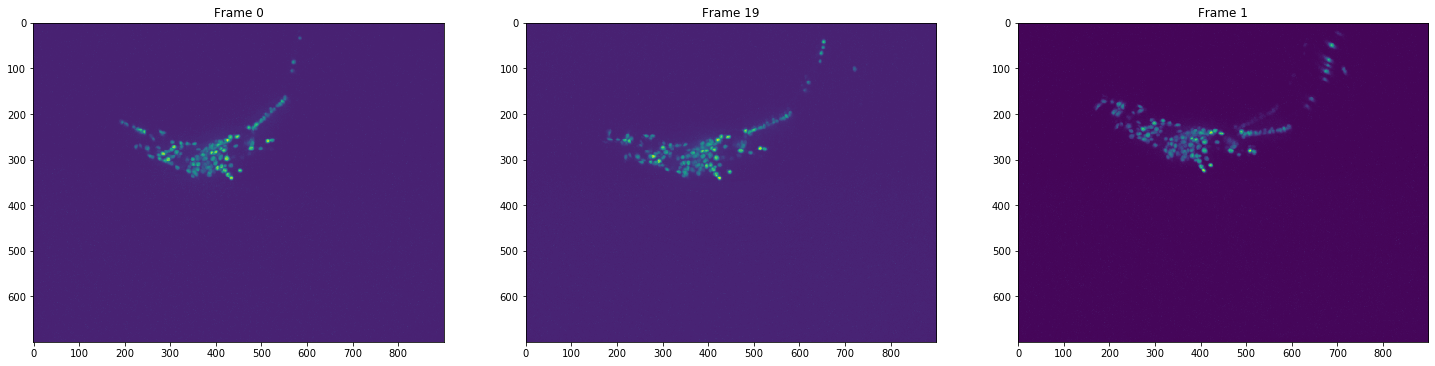

In [28]:
i = 0
i_neighbor0 = neighboring_ind[i]
dat0 = np.max(project_data.red_data[i_neighbor0, ...], axis=0)

i = 2
i_neighbor1 = neighboring_ind[i]
dat1 = np.max(project_data.red_data[i_neighbor1, ...], axis=0)

i_control = 1
dat_control = np.max(project_data.red_data[i_control, ...], axis=0)

plt.figure(figsize=(25,25))
plt.subplot(131)
plt.imshow(dat0)
plt.title(f"Frame {i_neighbor0}")
plt.subplot(132)
plt.imshow(dat1)
plt.title(f"Frame {i_neighbor1}")
plt.subplot(133)
plt.imshow(dat_control)
plt.title(f"Frame {i_control}")

In [31]:
from ipywidgets import interact

def f(i0=0, i1=1, i_control=1):
    i_neighbor0 = neighboring_ind[i0]
    dat0 = np.max(project_data.red_data[i_neighbor0, ...], axis=0)

    i_neighbor1 = neighboring_ind[i1]
    dat1 = np.max(project_data.red_data[i_neighbor1, ...], axis=0)

    dat_control = np.max(project_data.red_data[i_control, ...], axis=0)

    plt.figure(figsize=(25,25))
    plt.subplot(131)
    plt.imshow(dat0)
    plt.title(f"Frame {i_neighbor0}")
    plt.subplot(132)
    plt.imshow(dat1)
    plt.title(f"Frame {i_neighbor1}")
    plt.subplot(133)
    plt.imshow(dat_control)
    plt.title(f"Frame {i_control}")
    
    plt.show()

interact(f, i0=list(range(len(neighboring_ind))), i1=list(range(len(neighboring_ind))), i_control=list(range(len(neighboring_ind))))

interactive(children=(Dropdown(description='i0', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…

<function __main__.f(i0=0, i1=1, i_control=1)>

In [32]:
project_data.napari_of_single_match((0,1))

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(15.5, 349.5, 449.5), zoom=1.8524320457796852, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=4, ndisplay=3, last_used=3, range=((0.0, 1.0, 1.0), (0.0, 31.0, 1.0), (0.0, 699.0, 1.0), (0.0, 899.0, 1.0)), current_step=(0, 0, 0, 0), order=(0, 1, 2, 3), axis_labels=('0', '1', '2', '3')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'raw_red_data' at 0x7f715eddded0>, <Points layer 'n0_zxy_raw' at 0x7f715dbf8fd0>, <Points layer 'n1_zxy_raw' at 0x7f715eff1750>, <Tracks layer 'final_matches' at 0x7f715f07e610>, <Points layer 'Raw IDs' at 0x7f715f1f4790>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, unit=None), text_overlay=TextOverlay(vi

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/jupyter_client/threaded.py", line 121, in _handle_recv
    msg_list = self.ioloop._asyncio_event_loop.run_until_complete(get_msg(future_msg))
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/asyncio/base_events.py", line 563, in run_until_complete
    self._check_runnung()
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/asyncio/base_events.py", line 526, in _check_runnung
    'Cannot run the event loop while another loop is running')
RuntimeError: Cannot run the event loop while another loop is running
ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/charles/anaconda3/envs/torch/lib/pyth

# Use classes

In [19]:
%load_ext autoreload
%autoreload 2
from wbfm.utils.postures.centerline_pca import WormFullVideoPosture, WormReferencePosture
from wbfm.utils.pipeline.tracklet_class import NeuronComposedOfTracklets, TrackedWorm, DetectedTrackletsAndNeurons
from wbfm.utils.projects.finished_project_data import ProjectData
import numpy as np
import pandas as pd
from wbfm.utils.pipeline.matches_class import MatchesWithConfidence
from wbfm.utils.feature_detection.class_frame_pair import calc_FramePair_from_Frames
from tqdm.auto import tqdm
from wbfm.utils.pipeline.matches_class import get_tracklet_name_from_full_name
import importlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-tracklet_wiggle/project_config.yaml"
fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17/project_config.yaml"

project_data = ProjectData.load_final_project_data_from_config(fname, to_load_tracklets=True, to_load_frames=True)

Output files: /scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/global2tracklet_manual.pickle, /scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/manually_split_tracklets.h5, /scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/split_names.pickle, /scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/split_times.pickle
Project data for directory:
/scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17 
Found the following raw data files:
red_data: True
green_data: True
============Segmentation===============
raw_segmentation: True
segmentation: True
============Tracklets==================
df_training_tracklets: True
reindexed_masks_training: True
============Traces=====================
red_traces: True
green_traces: True
final_tracks: True
behavior_annotations: True



In [20]:
df_tracklets = project_data.df_all_tracklets
num_frames = project_data.num_frames
all_frames = project_data.raw_frames
all_matches = project_data.raw_matches
raw_clust = project_data.raw_clust

frame_pair_options = all_matches[(0,1)].options

In [193]:
# Build intermediate object: mapping from neurons within a frame to their tracklet ID
from wbfm.utils.pipeline.matches_class import MatchesAsGraph
import wbfm.utils.pipeline.matches_class as matches_class
importlib.reload(matches_class)

local_neuron_to_tracklet = MatchesAsGraph(offset_convention=[True, False],
                                          naming_convention=['neuron', 'tracklet'],
                                          name_prefixes=['frame', 'trackletGroup'])

for i, row in tqdm(raw_clust.iterrows(), total=len(raw_clust)):
    i_tracklet = int(row['clust_ind'])
    for i_local_frame, (i_local_neuron, i_global_frame) in enumerate(zip(row['all_ind_local'], row['slice_ind'])):
        try:
            conf = row['all_prob'][i_local_frame]
        except IndexError:
            conf = np.nan
        local_neuron_to_tracklet.add_match_if_not_present([i_local_neuron, i_tracklet, conf], group_ind0=i_global_frame)

  0%|          | 0/16624 [00:00<?, ?it/s]

In [23]:
fname = "/project/neurobiology/zimmer/wbfm/centerline/wbfm_ulises_centerline_for_charlie/2021-03-04_16-17-30_worm3_ZIM2051-_spline_K.csv"

full_posture = WormFullVideoPosture(fname)

In [24]:
reference_posture = WormReferencePosture(0, full_posture)

In [173]:
# Initialize TrackedNeurons at 0, and initialize the TrackedWorm
# Get all tracklets that start at t=0
all_tracklet_names = df_tracklets.columns.get_level_values(0).drop_duplicates()

detections = DetectedTrackletsAndNeurons(df_tracklets, 
                                         project_data.segmentation_metadata,
                                         df_tracklet_matches=raw_clust)
worm_obj = TrackedWorm(detections=detections, verbose=1)

for i, name in enumerate(all_tracklet_names):
    tracklet = df_tracklets[name]
    if np.isnan(tracklet['z'].iloc[0]):
        break
    new_neuron = worm_obj.initialize_new_neuron()
    new_neuron.add_tracklet(i, 1.0, tracklet, metadata=f"Initial tracklet")

In [ ]:

all_long_range_matches = {}
anchor_ind = 0
anchor_frame = all_frames[anchor_ind]
verbose = 2

In [174]:
# Loop over times, and if any TrackedNeuron's have a gap, use the WormReferencePosture to attempt a long-distance match
for t in tqdm(range(1, num_frames)):
    
    tracks_with_gap = worm_obj.tracks_with_gap_at_or_after_time(t)
    if not tracks_with_gap:
        continue
    
    # Then do one volume-volume match to try and continue all ended tracklets
    i_next_similar_posture = reference_posture.get_next_close_index(t)
    pair_indices = (anchor_ind, i_next_similar_posture)
    long_range_pair = all_long_range_matches.get(pair_indices, None)
    if long_range_pair is None:
        long_range_frame = all_frames[i_next_similar_posture]
        if verbose >= 2:
            print(f"Calculating matches for pair: {pair_indices}")
        long_range_pair = calc_FramePair_from_Frames(frame0=anchor_frame, frame1=long_range_frame, frame_pair_options=frame_pair_options)

        all_long_range_matches[pair_indices] = long_range_pair
    else:
        if verbose >= 3:
            print(f"Reusing matches for pair: {pair_indices}")
    
    # Build convinience class
    long_range_pair.calc_final_matches()
    long_range_matches = MatchesWithConfidence.matches_from_array(np.array(long_range_pair.final_matches))
    mapping_to_long_range = long_range_matches.get_mapping_0_to_1()
    mapping_to_confidence = long_range_matches.get_mapping_pair_to_conf()
    
    tracks_that_are_filled = 0
    for track_name, track in tracks_with_gap.items():
        
        # From the starting neuron, get the long-range match
        i_starting_neuron = track.neuron_ind
        i_matched_neuron = mapping_to_long_range.get(i_starting_neuron, None)
        if i_matched_neuron is None:
            continue
        # if i_matched_neuron is None:
        #     print(f"No matched neuron for track {track_name}")
        # else:
        #     print(f"Found a match for {track_name}: {i_matched_neuron}")
        conf = mapping_to_confidence[(i_starting_neuron, i_matched_neuron)]
        
        # From the long-range match (including frame information), get the tracklet
        # For now, just accept it
        full_index = (0, i_matched_neuron, i_next_similar_posture)
        matched_tracklet_graph_name = local_neuron_to_tracklet.get_unique_match(full_index)
        if matched_tracklet_graph_name is None:
            # i.e. there was a neuron match, but it doesn't belong to any tracklet
            continue
        _, _, matched_tracklet_ind = local_neuron_to_tracklet.name2tuple(matched_tracklet_graph_name)
        matched_tracklet_local_name = worm_obj.detections.int_to_tracklet_name(matched_tracklet_ind)
        # matched_tracklet_local_name = get_tracklet_name_from_full_name(matched_tracklet_graph_name)
        df_matched_tracklet = worm_obj.detections.df_tracklets_zxy[matched_tracklet_local_name]
        track.add_tracklet(matched_tracklet_ind, 
                           confidence=conf, 
                           tracklet=df_matched_tracklet, 
                           metadata=f"Match due to pair {pair_indices}")
        
        # TODO: Also record if the matched neurons match the tracklets that didn't end
        tracks_that_are_filled += 1
        
    if verbose >= 2:
        print(f"At time {t}, extended {tracks_that_are_filled}/{len(tracks_with_gap)} tracks")
    
    if t > 10:
        break

  0%|          | 0/1499 [00:00<?, ?it/s]

At time 6, extended 4/4 tracks
At time 7, extended 3/3 tracks
At time 8, extended 10/11 tracks
At time 9, extended 3/4 tracks
At time 10, extended 2/3 tracks
At time 11, extended 6/8 tracks


In [192]:
local_neuron_to_tracklet.offset_convention

[True, False]

In [194]:
matched_tracklet_graph_name, local_neuron_to_tracklet.name2tuple(matched_tracklet_graph_name)

('bipartite_1_trackletGroup_1_neuron162', (1, 40, 145))

In [196]:
worm_obj.detections.int_to_tracklet_name(145)

'neuron190'

In [177]:
for k, v in worm_obj.global_name_to_neuron.items():
    if t > v.next_gap:
        print(k, v.next_gap)

neuron_015 10
neuron_053 5
neuron_070 10
neuron_097 7
neuron_109 6
neuron_115 7
neuron_118 10


In [190]:
worm_obj.detections.int_to_tracklet_name(145)

'neuron190'

In [224]:
df_tracklets['neuron11']['likelihood'][0] = 1.0

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [232]:
df_tracklets['neuron11']['likelihood']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1494    NaN
1495    NaN
1496    NaN
1497    NaN
1498    NaN
Name: likelihood, Length: 1499, dtype: float64

In [231]:
df_tracklets['neuron11', 'likelihood'][0:10] = 1.0

In [181]:
name = 'neuron_053'

np.array(worm_obj.global_name_to_neuron[name].tracklet_covering_ind)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4])

In [182]:
worm_obj.global_name_to_neuron[name].neuron2tracklets.edges(data=True)

EdgeDataView([('bipartite_0_neuron_0_neuron_053', 'bipartite_1_trackletGroup_1_neuron52', {'metadata': 'Initial tracklet', 'weight': 1.0}), ('bipartite_0_neuron_0_neuron_053', 'bipartite_1_trackletGroup_1_neuron43', {'metadata': 'Match due to pair (0, 16)', 'weight': 0.7021018516832751})])

In [183]:
worm_obj.global_name_to_neuron[name].neuron2tracklets.nodes(data=True)

NodeDataView({'bipartite_0_neuron_0_neuron_053': {'bipartite': 0, 'local_ind': 52, 'group_ind': 0}, 'bipartite_1_trackletGroup_1_neuron52': {'bipartite': 1, 'local_ind': 52, 'group_ind': 0}, 'bipartite_1_trackletGroup_1_neuron43': {'bipartite': 1, 'local_ind': 52, 'group_ind': 0}})

In [47]:

def get_tracklet_name_from_full_name(name):
    """Assume name is like: bipartite_1_trackletGroup_1_neuron228"""
    return name.split('_')[-1]


In [ ]:
import wbfm.utils.pipeline.matches_class as matches_class
importlib.reload(matches_class)
long_range_pair.calc_final_matches()
long_range_matches = MatchesWithConfidence.matches_from_array(long_range_pair.final_matches)
mapping_to_long_range = long_range_matches.get_mapping_0_to_1()

In [22]:
tracklet_dictionary = TrackletDictionary(df_tracklets, project_data.segmentation_metadata, raw_clust)

# Get the relevant neuron index in the reference frame
key = 'neuron_041'
this_neuron_obj = tracks_with_gap[key]

i_tracklet = this_neuron_obj.neuron_ind
tracklet_dictionary.get_neuron_index_within_tracklet(i_tracklet, t_local=0)

# Get the match in frame1

# Get the position in frame1

# Get the corresponding tracklet

AttributeError: 'TrackedNeuron' object has no attribute 'neuron_ind'

# Scratch

In [249]:
import matplotlib.pyplot as plt



64096

In [238]:
raw_clust

,clust_ind,all_ind_local,all_xyz,all_prob,slice_ind
0,0,"[0, 5, 1, 1, 1, 1, 4, 4, 3, 0, 4, 4, 2, 4, 3, ...","[[4.8771146066011655, 297.7740983145629, 424.0...","[[0.3664077302417685], [0.15163196729664105], ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,1,"[1, 4, 4, 2, 5, 7, 6, 7, 7, 7, 7, 1, 3, 9, 10,...","[[4.5420842803383135, 313.3114124967398, 433.1...","[[0.2292424971146307], [0.25094726101312165], ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,2,"[2, 2, 0, 5, 6, 8, 8, 12, 9, 9, 6, 2, 7, 1, 0,...","[[5.850456465458509, 279.90286483172093, 417.9...","[[0.32134276791509425], [0.25540217827506717],...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,3,"[3, 9, 6, 6, 8, 10, 9, 154, 146, 6, 5, 0, 4, 7...","[[6.150039738760841, 300.02505269705244, 349.5...","[[0.2654288643409178], [0.430321175706038], [0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,4,"[4, 8, 8, 9, 9, 11, 13, 13, 10, 13, 10, 9, 14,...","[[6.238351989685284, 308.2635234132333, 399.32...","[[0.3794733326848895], [0.3498234953136751], [...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
...,...,...,...,...,...
16619,16619,"[123, 137]","[[22.47536527353041, 225.210499490316, 444.939...","[[0.3087716962826537], [0.0]]","[1497, 1498]"
16620,16620,"[125, 93]","[[23.031576980568012, 247.93609865470853, 514....","[[0.302108269841081], [0.0]]","[1497, 1498]"
16621,16621,"[135, 135]","[[25.22053515868077, 239.75756067205972, 421.7...","[[0.41354483858232116], [0.0]]","[1497, 1498]"
16622,16622,"[146, 132]","[[29.038951494365506, 241.31945124938755, 398....","[[0.2476820022724967], [0.0]]","[1497, 1498]"


In [253]:
ind = raw_clust.at[0, 'all_ind_local']
slices = raw_clust.at[0, 'slice_ind']

In [261]:
segmentation_metadata = project_data.segmentation_metadata
this_local_ind = ind
which_frames = slices

# NOTE: these local indices start at 0, which are direct list indices, not the dataframe indices
this_brightness, this_volume = [], []
for i_local, i_frame in zip(this_local_ind, which_frames):
    this_brightness.append(segmentation_metadata.get_all_brightnesses(i_frame).iloc[i_local])
    this_volume.append(segmentation_metadata.get_all_volumes(i_frame).iloc[i_local])
this_brightness = np.expand_dims(np.array(this_brightness), -1)
this_volume = np.expand_dims(np.array(this_volume), -1)

In [263]:
this_brightness.shape

(117, 1)

In [ ]:
m = MatchesWithConfidence()

In [18]:
tracklet_dictionary.df_tracklets_zxy

bodyparts   neuron0                                      neuron1              \
coords            z           x           y likelihood         z           x   
0          4.877115  297.774098  424.044846   0.366408  4.542084  313.311412   
1          4.495950  280.282714  407.775260   0.151632  4.130645  298.316611   
2          6.018471  272.740668  406.364028   0.431153  4.173412  287.559807   
3          5.427147  255.625872  396.335380   0.304492  4.098089  271.716247   
4          5.120417  249.088674  407.942513   0.399028  3.630491  264.485370   
...             ...         ...         ...        ...       ...         ...   
1494            NaN         NaN         NaN        NaN       NaN         NaN   
1495            NaN         NaN         NaN        NaN       NaN         NaN   
1496            NaN         NaN         NaN        NaN       NaN         NaN   
1497            NaN         NaN         NaN        NaN       NaN         NaN   
1498            NaN         NaN         NaN        NaN       NaN         NaN   

bodyparts                          neuron2              ... neuron1010807  \
coords              y likelihood         z           x  ...             y   
0          433.153732   0.229242  5.850456  279.902865  ...           NaN   
1          412.867468   0.250947  5.305299  261.702269  ...           NaN   
2          406.981428   0.337725  6.034031  253.445313  ...           NaN   
3          396.642877   0.269064  6.139057  237.078493  ...           NaN   
4          415.498987   0.265040  6.745626  232.108068  ...           NaN   
...               ...        ...       ...         ...  ...           ...   
1494              NaN        NaN       NaN         NaN  ...           NaN   
1495              NaN        NaN       NaN         NaN  ...           NaN   
1496              NaN        NaN       NaN         NaN  ...           NaN   
1497              NaN        NaN       NaN         NaN  ...           NaN   
1498              NaN        NaN       NaN         NaN  ...           NaN   

bodyparts            neuron1010808                    neuron1010809          \
coords    likelihood             z   x   y likelihood             z   x   y   
0                NaN           NaN NaN NaN        NaN           NaN NaN NaN   
1                NaN           NaN NaN NaN        NaN           NaN NaN NaN   
2                NaN           NaN NaN NaN        NaN           NaN NaN NaN   
3                NaN           NaN NaN NaN        NaN           NaN NaN NaN   
4                NaN           NaN NaN NaN        NaN           NaN NaN NaN   
...              ...           ...  ..  ..        ...           ...  ..  ..   
1494             NaN           NaN NaN NaN        NaN           NaN NaN NaN   
1495             NaN           NaN NaN NaN        NaN           NaN NaN NaN   
1496             NaN           NaN NaN NaN        NaN           NaN NaN NaN   
1497             NaN           NaN NaN NaN        NaN           NaN NaN NaN   
1498             NaN           NaN NaN NaN        NaN           NaN NaN NaN   

bodyparts             
coords    likelihood  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
...              ...  
1494             NaN  
1495             NaN  
1496             NaN  
1497             NaN  
1498             NaN  

[1499 rows x 43236 columns]

In [147]:
np.where(df_tracklets['neuron0']['z'].notnull())

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116]),)

In [151]:
tracklet['z'].iloc[0]

4.8771146066011655

In [161]:
all_tracklet_names = df_tracklets.columns.get_level_values(0).drop_duplicates()
all_tracklet_names

Index(['neuron0', 'neuron1', 'neuron2', 'neuron3', 'neuron4', 'neuron5',
       'neuron6', 'neuron7', 'neuron8', 'neuron9',
       ...
       'neuron1010800', 'neuron1010801', 'neuron1010802', 'neuron1010803',
       'neuron1010804', 'neuron1010805', 'neuron1010806', 'neuron1010807',
       'neuron1010808', 'neuron1010809'],
      dtype='object', name='bodyparts', length=10809)

In [41]:
np.where(~np.isfinite(centerlineK.shape))

(array([], dtype=int64),)

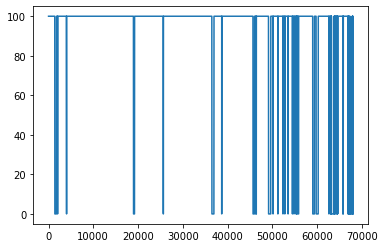

In [45]:
plt.plot(centerlineK.count(axis=1))

In [56]:
centerlineK.shape

(67995, 100)

In [53]:
np.nanmin(centerlineK)

-20.097424644876696